## Classification Project Exploration Notebook

Report needs:
- 4 questions of the data
- 4 visualizations (1 for each question)
- Statistical test for each question
- Takeaway notes for each question

- context for the target variable (visualization)
- 3 best models for predicting churn



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from prepare import prep_telco


In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,0,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,0,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,1,Month-to-month,Fiber optic,Mailed check


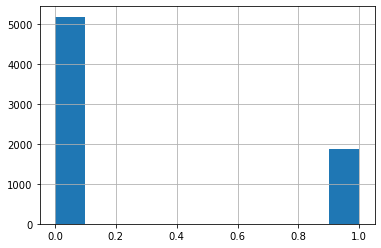

In [11]:
df.churn.hist()
plt.show()

In [12]:
df.churn.mean()

0.2653698707936959

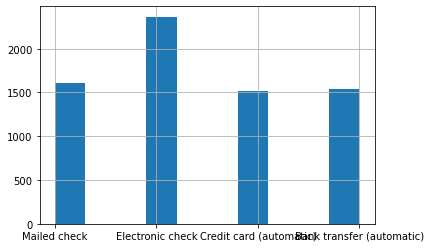

In [13]:
df.payment_type.hist()
plt.show()

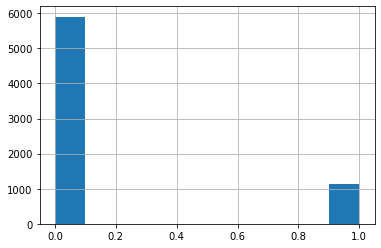

In [14]:
df.senior_citizen.hist()
plt.show()

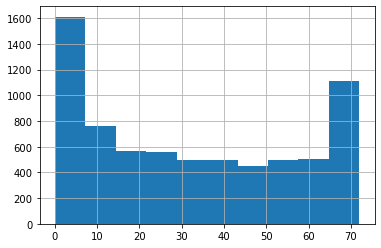

In [15]:
df.tenure.hist()
plt.show()

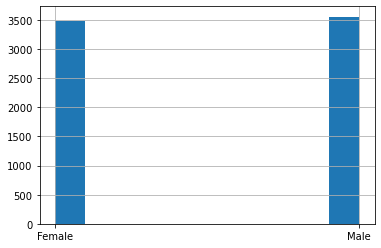

In [16]:
df.gender.hist()
plt.show()

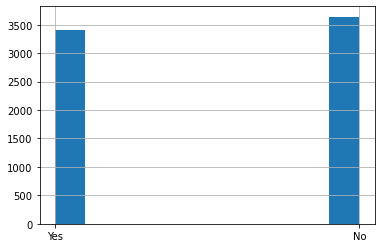

In [17]:
df.partner.hist()
plt.show()

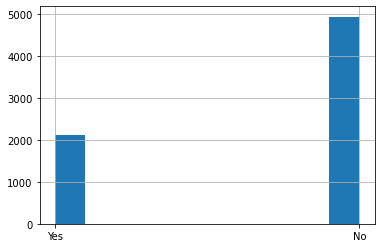

In [18]:
df.dependents.hist()
plt.show()

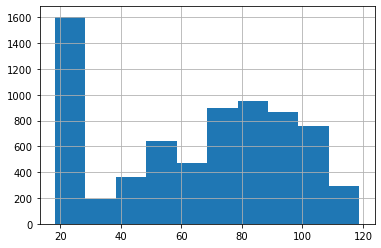

In [19]:
df.monthly_charges.hist()
plt.show()

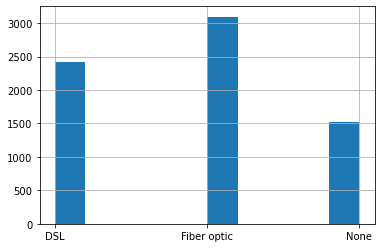

In [20]:
df.internet_service_type.hist()
plt.show()

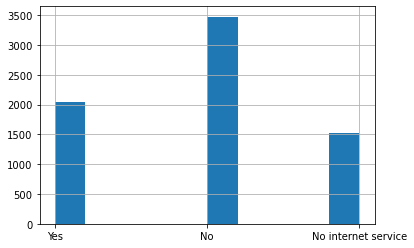

In [24]:
df.tech_support.hist()
plt.show()

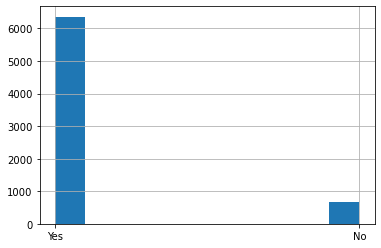

In [26]:
df.phone_service.hist()
plt.show()

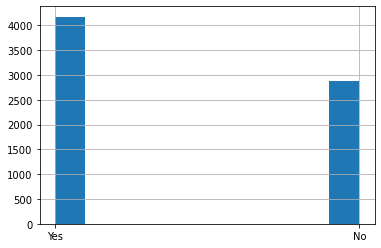

In [27]:
df.paperless_billing.hist()
plt.show()

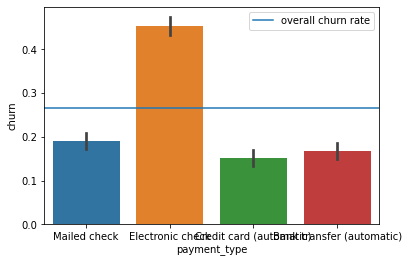

In [8]:
sns.barplot(x='payment_type', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

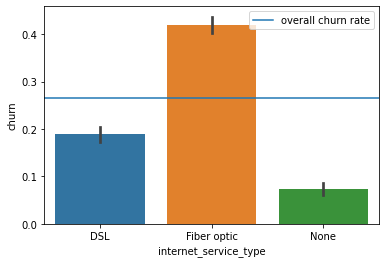

In [9]:
sns.barplot(x='internet_service_type', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

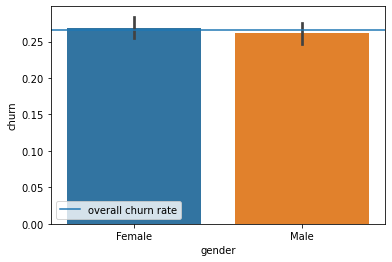

In [10]:
sns.barplot(x='gender', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

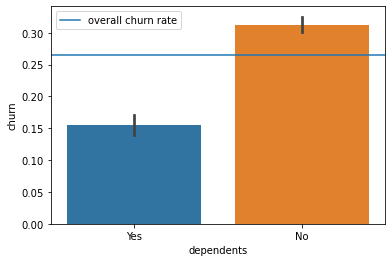

In [21]:
sns.barplot(x='dependents', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

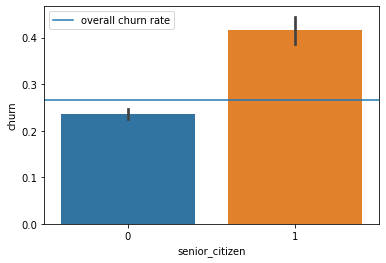

In [22]:
sns.barplot(x='senior_citizen', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

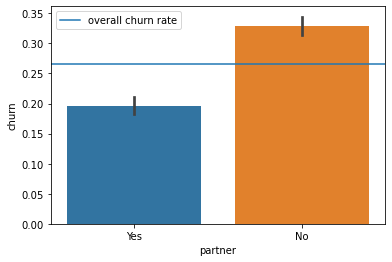

In [23]:
sns.barplot(x='partner', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

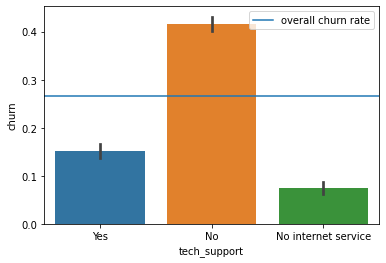

In [25]:
sns.barplot(x='tech_support', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

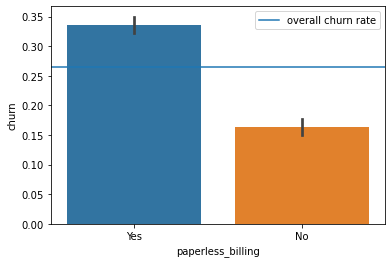

In [28]:
sns.barplot(x='paperless_billing', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

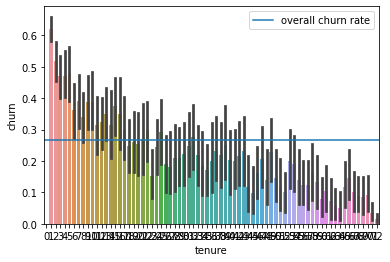

In [29]:
sns.barplot(x='tenure', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

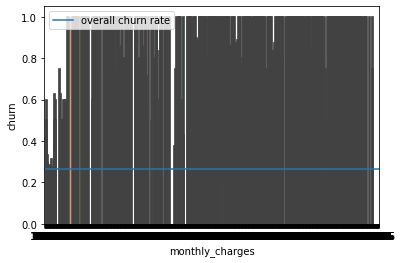

In [30]:
sns.barplot(x='monthly_charges', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

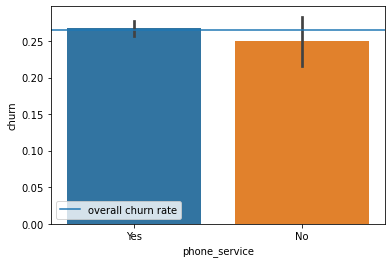

In [31]:
sns.barplot(x='phone_service', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

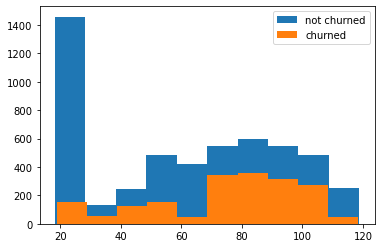

In [35]:
churned = df[df.churn == 1]
not_churn = df[df.churn == 0]
plt.hist(not_churn.monthly_charges, label = 'not churned')
plt.hist(churned.monthly_charges, label = 'churned')
plt.legend()
plt.show()

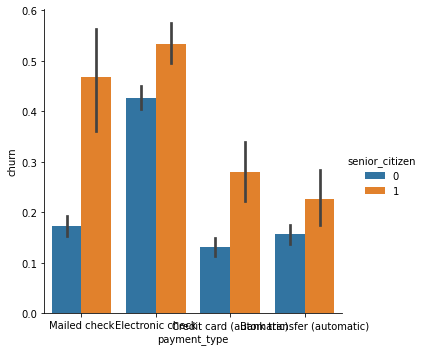

In [36]:
sns.catplot(data=df, x="payment_type", y="churn", hue="senior_citizen", kind="bar")
plt.show()

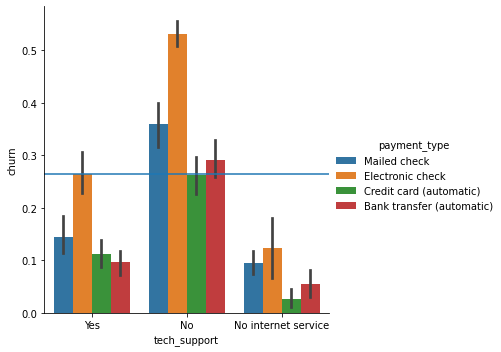

In [39]:
sns.catplot(data=df, x="tech_support", y="churn", hue="payment_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

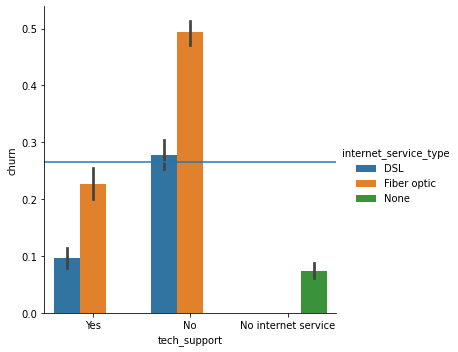

In [40]:
sns.catplot(data=df, x="tech_support", y="churn", hue="internet_service_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

---

---

In [ ]:
#refine the prepare telco data function

def prep_telco2(df):
    df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)
    df = df.drop(columns = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    encode_cols = [col for col in df.columns if df[col].dtype == 'O']
    for col in encode_cols:
        dummie_df = pd.get_dummies(df[col], prefix = df[col].name, drop_first = True)
    
    df = pd.concat([df, dummie_df], axis=1)
    df = df.rename(columns={'payment_type_Credit card (automatic)':'pay_credit', 'payment_type_Electronic check': 'pay_elec', 'payment_type_Mailed check': 'pay_mail'})
    
    
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

In [4]:
df = prep_telco(df)

In [5]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,1,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,0,1


In [6]:
#create the split telco data variable

def split_telco_data(df):
    train_val, test = train_test_split(df, train_size = 0.8, stratify = df.churn, random_state=123)
    train, validate = train_test_split(train_val, train_size = 0.7, stratify = train_val.churn, random_state=123)
    return train, validate, test

In [7]:
train, validate, test = split_telco_data(df)

In [8]:
train.shape, validate.shape, test.shape

((3943, 46), (1691, 46), (1409, 46))

---

---

## Start here with updated prepare function in prepare.py

In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prep_telco(df)

In [4]:
train.shape, validate.shape, test.shape

((3943, 46), (1691, 46), (1409, 46))

In [5]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail
5310,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,Yes,...,0,1,1,0,1,0,0,0,0,0
3790,Male,1,Yes,No,72,Yes,Yes,No,Yes,Yes,...,0,0,0,0,1,0,0,1,0,0
4398,Female,1,Yes,No,46,Yes,Yes,No,No,No,...,0,1,0,1,0,1,0,0,1,0
2635,Male,0,No,No,4,No,No phone service,No,No,No,...,0,1,1,0,0,0,0,0,1,0
2986,Male,0,Yes,No,8,Yes,No,No,Yes,Yes,...,0,0,1,0,0,0,0,0,0,1


In [6]:
train.shape

(3943, 46)

In [7]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

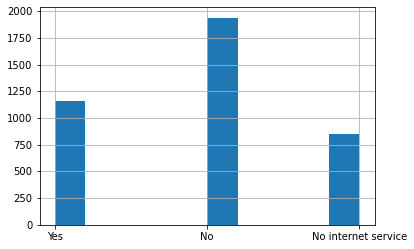

In [8]:
train.tech_support.hist()
plt.show()

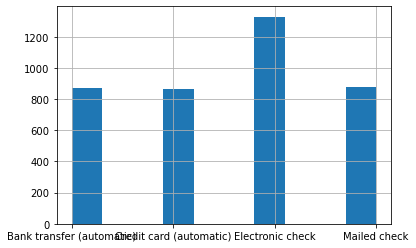

In [9]:
train.payment_type.hist()
plt.show()

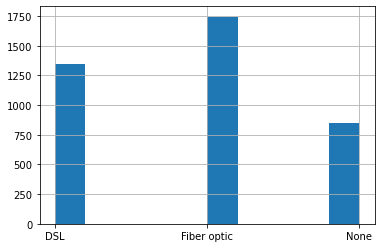

In [10]:
train.internet_service_type.hist()
plt.show()

In [11]:
churn_mean = train.churn.mean()

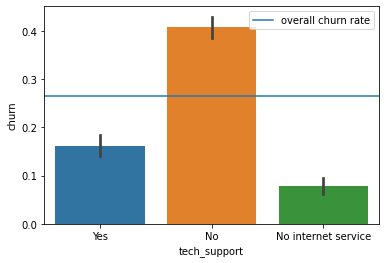

In [12]:
sns.barplot(x='tech_support', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

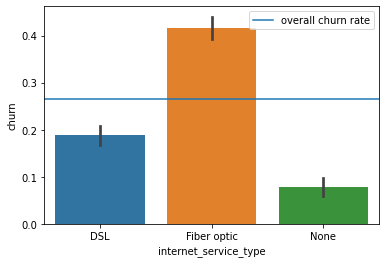

In [13]:
sns.barplot(x='internet_service_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

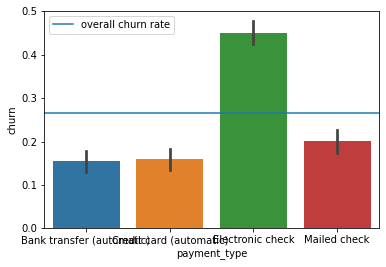

In [14]:
sns.barplot(x='payment_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

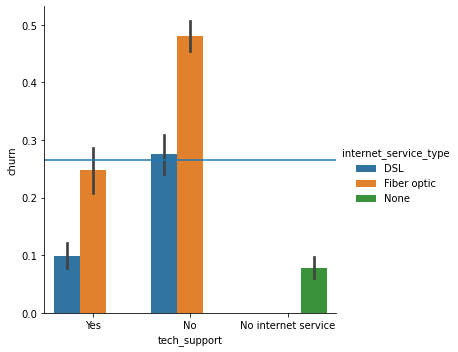

In [15]:
sns.catplot(data=train, x="tech_support", y="churn", hue="internet_service_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

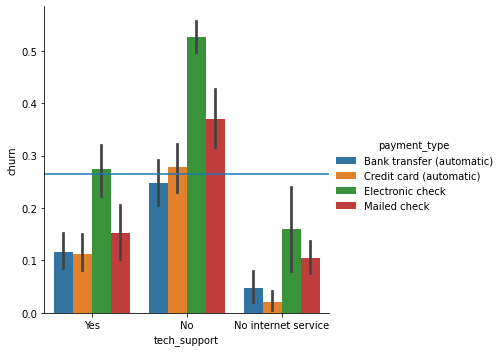

In [16]:
sns.catplot(data=train, x="tech_support", y="churn", hue="payment_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

In [17]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type', 'gender_Male',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One year',
       'contract_type_Two year',

In [ ]:
x_cols = 